In [3]:
import pandas as pd
import pickle

In [4]:
### Connect to my AWC instance and pull the data from postgres table 'proj3'
from login import cnx
df = pd.read_sql_query('''SELECT * FROM proj3''',cnx)

In [5]:
df.shape

(3154, 671)

In [6]:
### delete columns with more than 10% missing values
for c in df:
    if sum(df[c].isnull())/df.shape[0] >= 0.1:
        df.drop(c, axis=1, inplace=True)

In [7]:
### drop index inherited from dataframe
df = df.drop('crap',axis=1)

In [8]:
df.shape

(3154, 496)

In [9]:
### Separate columns into two lists: dummies and continuous
dummies = []
cont = []
for column in df.columns:
    if df[column].nunique() == 2:
        dummies.append(column)
    else:
        cont.append(column)          

In [10]:
### Fill missing continuous values with medians
df_c = df[cont].fillna(df.median())

In [11]:
df_c.shape

(3154, 44)

In [12]:
### Fill missing dummies with zeros (as they are all indicators)
df_d = df[dummies].fillna(0)

In [13]:
df_d.shape

(3154, 452)

In [14]:
### Drop non-features from the list of continues columns
cont_clean = list(filter(lambda x: x not in ('id','segment','wt_ppl'), df_c))

In [15]:
### Arrange inputs into X dataframe, weights into wt series, and segments into y series and 
### y_ (numeric representation of y) series
X = pd.concat([df_d, df_c[cont_clean]], axis=1)
wt= df['wt_ppl']
y_ = pd.to_numeric(df['segment'])
y = df['segment'].apply(lambda x: x.zfill(2))

In [16]:
print(X.shape)
print(wt.shape)
print(y.shape)
print(y_.shape)

(3154, 493)
(3154,)
(3154,)
(3154,)


In [29]:
### Counts by segment
y.value_counts().sort_index()

01    202
02    216
03    220
04    315
05    393
06    288
07    325
08    225
09    132
10    287
11    253
12    298
Name: segment, dtype: int64

In [17]:
### Save as pickle files
pickle.dump(X, open("inputs.p",'wb'))
pickle.dump(wt, open("weights.p",'wb'))
pickle.dump(y, open("target.p",'wb'))
pickle.dump(y_, open("target_.p",'wb'))

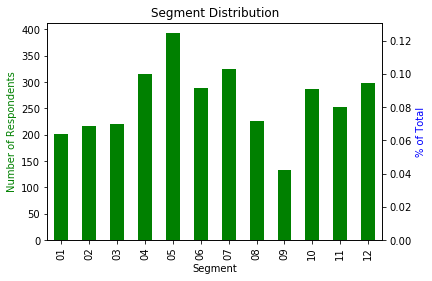

In [62]:
### Get class distribution chart

import matplotlib.pyplot as plt
%matplotlib inline
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

plt.title('Segment Distribution')

ax1.set_xlabel('Segment')
ax1.set_ylabel('Number of Respondents', color='g')
ax2.set_ylabel('% of Total', color='b')
y.value_counts().sort_index(ascending=True).plot(ax=ax1, kind='bar',color='g')
y_dist.sort_index(ascending=True).plot(ax=ax2, kind='bar',color='g')

plt.savefig('Segment_Distr.png', bbox_inches='tight')